In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix'

/content/drive/My Drive/Colab Notebooks/matrix


In [4]:
ls data

shoes_prices.csv


In [5]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)
df.shape

(19387, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [7]:
df = df[df['prices_currency']=='USD'].copy()
df['prices_amountmin'] = df['prices_amountmin'].astype(np.float)
filter_max = np.percentile(df['prices_amountmin'], 99)
df = df[df['prices_amountmin'] < filter_max]
df.shape

(18280, 48)

In [8]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [9]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

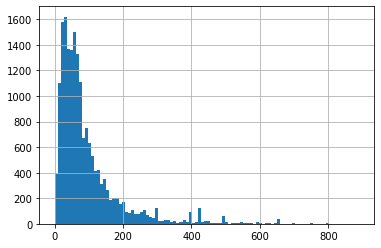

In [11]:
df['prices_amountmin'].hist(bins=100);

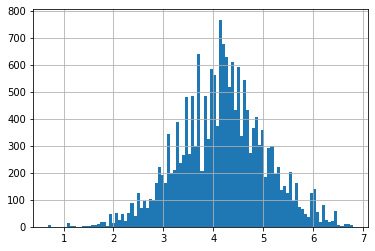

In [13]:
# np.log(df['prices_amountmin']+1).hist(bins=100);  # the same as below
np.log1p(df['prices_amountmin']+1).hist(bins=100);

In [14]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [16]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [57]:
y_true = df['prices_amountmin']
price_log_mean = np.mean(np.log1p(y_true))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, np.expm1(y_pred))

58.03539547661041

In [17]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [18]:
df.brand.value_counts()

Nike                                1709
PUMA                                 574
Ralph Lauren                         524
New Balance                          361
VANS                                 356
                                    ... 
David Spencer                          1
Hanwag                                 1
Customised_Perfection                  1
DKNY                                   1
LUOS CULTURAL GOODS (USA SELLER)       1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [27]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [29]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [30]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'cat_brand',
       'brand_cat'],
      dtype='object')

In [32]:
df['manufacturer'].value_counts()

Puma               476
Nike               374
New Balance        249
VANS               170
Reebok             128
                  ... 
2(x)ist              1
Reef Footwear        1
Vasque Footwear      1
Amer Sports          1
Osiris Shoes         1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [39]:
df['colors'].value_counts()

Black                               1364
Brown                                746
Blue                                 421
Multicolor                           415
White                                252
                                    ... 
Black,Navy,Red                         1
COOL GREYMETALLIC HEMATITE-BLACK       1
WhiteGrey Mist                         1
SharkCadmiumWhiteBlack                 1
Brick Red                              1
Name: colors, Length: 2080, dtype: int64

In [0]:
df['colors_cat'] = df['colors'].factorize()[0]

In [41]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [42]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.53930419908595, 4.311223231615432)

In [56]:
run_model(['brand_cat', 'manufacturer_cat', 'colors_cat'])

(-61.76723637561054, 5.743222840525922)

In [49]:
df['weight'].value_counts()

3.0 lbs       92
1.0 lbs       79
2.8 pounds    70
5.0 lbs       48
1 pounds      42
              ..
5 g            1
6.6 ounces     1
200 g          1
386 g          1
1.4 Kg         1
Name: weight, Length: 81, dtype: int64

In [51]:
df['sizes'].value_counts()

10                                                          266
11                                                          264
9                                                           233
12                                                          180
8                                                           167
                                                           ... 
8.5,6.5                                                       1
10,11,7.5,9.5                                                 1
10 M,11 M,12 M,13 M,7 M,8 M,9 M                               1
13.5 / 14.5                                                   1
10 Medium,12 Medium,8 Medium,9 Medium,11 Medium,7 Medium      1
Name: sizes, Length: 1075, dtype: int64

In [0]:
df['weight_cat'] = df['weight'].factorize()[0]

In [55]:
run_model(['weight_cat'])

(-63.772166611222204, 3.629081601136923)